# Python 與機器學習（3）

## 郭耀仁

## 課程內容

- Kaggle 機器學習競賽
- 如何安裝 TensorFlow
- NLTK 簡介
- Jieba 簡介
- 專題

# Kaggle 機器學習競賽

## Kaggle 機器學習競賽

- [Kaggle](https://www.kaggle.com/)
- [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

## Kaggle 機器學習競賽（2）

- 我們要練習的是預測 **test.csv** 資料集中的 **Survived** 變數
- 用來訓練與測試的資料即是 **train.csv** 資料集
- 資料集的變數：

|變數|描述|
|---|----|
|PassengerId|乘客在資料集中的流水編號|
|Survived|存活與否，	0 = 歿、1 = 存|
|Pclass|社經地位，1 = 高、2 = 中、3 = 低|
|Name|乘客姓名|
|Sex|性別|
|Age|年齡|
|SibSp|船上旁系親屬的人數|
|Parch|船上直系親屬的人數|
|Ticket|船票編號|
|Fare|船票價格|
|Cabin|船艙編號|
|Embarked|登船港口，C = Cherbourg、Q = Queenstown、S = Southampton|

## Kaggle 機器學習競賽（3）

- 流程：

|步驟|內容|
|---|----|
|第一步|暸解資料外觀與內容|
|第二步|資料預處理|
|第三步|分類器|
|第四步|應用預測資料|
|第五步|上傳驗證|

# 第一次上傳

## 暸解資料外觀與內容

In [1]:
import pandas as pd

train_url = "https://storage.googleapis.com/py_ml_datasets/train.csv"
train = pd.read_csv(train_url)
train.head(3) # 前 3 個觀測值

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print train.shape
print train.isnull().sum()

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
print train.Survived[train.Sex == 'male'].value_counts(normalize = True, sort = False)
print "\n"
print train.Survived[train.Sex == 'female'].value_counts(normalize = True, sort = False)

0    0.811092
1    0.188908
Name: Survived, dtype: float64


0    0.257962
1    0.742038
Name: Survived, dtype: float64


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def bar_plotting(lst_1, lst_2, group_1, group_2):
    N = len(lst_1)
    ind = np.arange(N)
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, lst_1, width, color='r')
    rects2 = ax.bar(ind + width, lst_2, width, color='g')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels((0, 1))
    ax.set_xlabel("Survived")
    ax.set_ylabel('Survived Percentage')
    ax.legend((rects1[0], rects2[0]), (group_1, group_2))

male_survived = list(train.Survived[train.Sex == 'male'].value_counts(normalize = True, sort = False))
female_survived = list(train.Survived[train.Sex == 'female'].value_counts(normalize = True, sort = False))
bar_plotting(male_survived, female_survived, 'Men', 'Women')
plt.title('Survived Percentage by Gender')

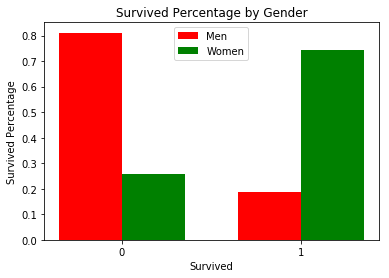

In [5]:
plt.show()

In [40]:
train_copied = train.copy()
age_not_null = ~ train_copied["Age"].isnull().values
train_copied = train.loc[age_not_null, :]
age_filter_under_18 = train_copied.Age < 18
age_filter_above_18 = train_copied.Age >= 18
train_copied.loc[:, "Child"] = 1
train_copied.loc[age_filter_above_18, 'Child'] = 0
print train_copied.Survived[train_copied.Child == 1].value_counts(normalize = True, sort = False)
print train_copied.Survived[train_copied.Child == 0].value_counts(normalize = True, sort = False)

0    0.460177
1    0.539823
Name: Survived, dtype: float64
0    0.638817
1    0.361183
Name: Survived, dtype: float64


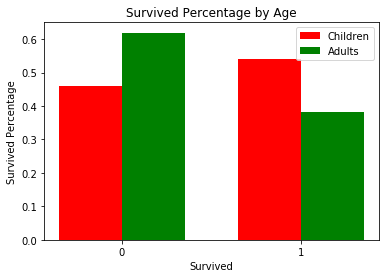

In [7]:
child_survived = list(train_copied.Survived[train_copied.Child == 1].value_counts(normalize = True, sort = False))
adult_survived = list(train_copied.Survived[train_copied.Child == 0].value_counts(normalize = True, sort = False))

bar_plotting(child_survived, adult_survived, 'Children', 'Adults')
plt.title('Survived Percentage by Age')
plt.show()

## 暸解資料外觀與內容（2）

- 如果我們模擬機器學習：
    - 看到乘客是男性且是成人：預測死亡
    - 看到乘客是女性且是小孩：預測存活

## 資料預處理

## 資料預處理

- $X$ 不要納入編號（PassengerId, Ticket）、姓名（Name）與遺漏值過多的變數（Cabin）
- 填補遺漏值
    - Embarked
    - Age

In [8]:
# Embarked 的遺漏值都以 "S" 填補
print train.Embarked.value_counts()
most_embarked = train.Embarked.value_counts().index[0]
train.Embarked = train.Embarked.fillna(most_embarked)
print sum(train.Embarked.isnull())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
0


In [9]:
# Age 的遺漏值以中位數填補
age_median = train.Age.median()
train.Age = train.Age.fillna(age_median)
print sum(train.Age.isnull())

0


## 資料預處理（2）

- 類別標籤編碼轉換（使用 One-hot encoding）
    - Sex
    - Embarked

In [10]:
# 使用 one-hot encoding 進行類別標籤編碼轉換
train_sex_embarked_dummies = pd.get_dummies(train.loc[:, ["Sex", "Embarked"]])
train_sex_embarked_ohe = train_sex_embarked_dummies.values.astype(float)
train_sex_embarked_dummies.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


## 分類器

## 分類器

- 決策樹分類器

In [11]:
from sklearn import tree

# 整理 features 跟 target
train_features = np.hstack((train.loc[:, ["Pclass", "Age", "SibSp", "Parch", "Fare"]].values, train_sex_embarked_ohe))
target = train.Survived.values

# 建立模型
tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 87)
tree_clf.fit(train_features, target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=87,
            splitter='best')

## 應用預測資料

In [12]:
test_url = "https://storage.googleapis.com/py_ml_datasets/test.csv"
test = pd.read_csv(test_url)
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [13]:
print test.shape
print test.isnull().sum()

(418, 11)
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [14]:
# Age 的遺漏值以中位數填補
age_median = test.Age.median()
test.Age = test.Age.fillna(age_median)
print sum(test.Age.isnull())

# Fare 的遺漏值以平均數填補
fare_median = test.Fare.median()
test.Fare = test.Fare.fillna(fare_median)
print sum(test.Fare.isnull())

0
0


In [15]:
# 使用 one-hot encoding 進行類別標籤編碼轉換
test_sex_embarked_dummies = pd.get_dummies(test.loc[:, ["Sex", "Embarked"]])
test_sex_embarked_ohe = test_sex_embarked_dummies.values.astype(float)
test_sex_embarked_dummies.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,1,0
1,1,0,0,0,1
2,0,1,0,1,0
3,0,1,0,0,1
4,1,0,0,0,1


In [16]:
# 整理 test_features
test_features = np.hstack((test.loc[:, ["Pclass", "Age", "SibSp", "Parch", "Fare"]].values, test_sex_embarked_ohe))

# 預估
predictions = tree_clf.predict(test_features)
print predictions

[0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 0 0]


## 上傳

- 參考 [Submission File Format](https://www.kaggle.com/c/titanic#evaluation) 整理一下上傳檔案

In [17]:
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(predictions, PassengerId, columns = ["Survived"])
print my_solution.head()
print my_solution.shape
my_solution.to_csv("my_first_solution.csv", index_label = ["PassengerId"])

     Survived
892         0
893         0
894         0
895         1
896         1
(418, 1)


## 第二次上傳

## 分類器

- 設定決策樹的參數：
    - max_depth
    - min_samples_split

In [18]:
# 建立模型
tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 87, max_depth = 10, min_samples_split = 5)
tree_clf.fit(train_features, target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=87,
            splitter='best')

## 應用預測資料

In [19]:
# 預估
predictions = tree_clf.predict(test_features)

## 上傳

In [20]:
my_solution = pd.DataFrame(predictions, PassengerId, columns = ["Survived"])
my_solution.to_csv("my_second_solution.csv", index_label = ["PassengerId"])

## 第三次上傳

## 資料預處理

- 將 `SibSp` 與 `Parch` 相加再加 1（自己）成為 `family_size`

In [21]:
train_copied = train.copy()
train_copied.loc[:, 'family_size'] = train_copied['SibSp'] + train_copied['Parch'] + 1

## 分類器

In [22]:
# 整理 features 跟 target
train_features = np.hstack((train_copied.loc[:, ["Pclass", "Age", "family_size", "Fare"]].values, train_sex_embarked_ohe))
target = train.Survived.values

# 建立模型
tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 87, max_depth = 10, min_samples_split = 5)
tree_clf.fit(train_features, target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=87,
            splitter='best')

## 應用預測資料

In [23]:
# 整理 test_features
test_copied = test.copy()
test_copied['family_size'] = test_copied['SibSp'] + test_copied['Parch'] + 1
test_features = np.hstack((test_copied.loc[:, ["Pclass", "Age", "family_size", "Fare"]].values, test_sex_embarked_ohe))

# 預估
predictions = tree_clf.predict(test_features)

## 上傳

In [24]:
my_solution = pd.DataFrame(predictions, PassengerId, columns = ["Survived"])
my_solution.to_csv("my_third_solution.csv", index_label = ["PassengerId"])

## 第四次上傳

## 分類器

- 改使用支持向量機分類器

In [25]:
from sklearn.svm import SVC

# 建立模型
svm_clf = SVC(kernel = 'linear', random_state = 87)
svm_clf.fit(train_features, target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=87, shrinking=True,
  tol=0.001, verbose=False)

## 應用預測資料

In [26]:
# 預估
predictions = svm_clf.predict(test_features)

## 上傳

In [27]:
my_solution = pd.DataFrame(predictions, PassengerId, columns = ["Survived"])
my_solution.to_csv("my_fourth_solution.csv", index_label = ["PassengerId"])

## 第五次上傳

## 分類器

- 改使用隨機森林分類器

In [28]:
from sklearn.ensemble import RandomForestClassifier

# 建立模型
forest_clf = RandomForestClassifier(max_depth = 10, min_samples_split = 5, n_estimators = 100, random_state = 87, criterion = 'entropy')
forest_clf.fit(train_features, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=87, verbose=0, warm_start=False)

## 應用預測資料

In [29]:
# 預估
predictions = forest_clf.predict(test_features)

## 上傳

In [30]:
my_solution = pd.DataFrame(predictions, PassengerId, columns = ["Survived"])
my_solution.to_csv("my_fifth_solution.csv", index_label = ["PassengerId"])

## 如何增進模型表現

- 調整參數（第二次上傳）
- 特徵工程（第三次上傳）
- 調換模型（第四、五次上傳）

## 如何增進模型表現（2）

- `Age` 變數遺漏值的填補方式能不能改善？
- `Name` 變數是否要直接丟棄？裡面有沒有能夠使用的資訊？
- `Cabin` 變數是否要直接丟棄？裡面有沒有能夠使用的資訊？
- 是否試著一起使用幾個分類器（整體學習）？

# 安裝 TensorFlow

## 安裝 TensorFlow

- [MNIST 資料集](http://yann.lecun.com/exdb/mnist/)
- 用 TensorFlow 讀入是我覺得最方便的方式

> **TensorFlow** is an open source software library for numerical computation using data flow graphs. The graph nodes represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) that flow between them. This flexible architecture lets you deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device without rewriting code.

## 安裝 TensorFlow（2）

- 建立一個虛擬環境（virtual environment）命名為 tensorflow

```bash
# for mac
conda create --name tensorflow python=2

# for windows
conda create --name tensorflow python=3.5
```

## 安裝 TensorFlow（3）

- 啟動 tensorflow 這個虛擬環境

```bash
# for mac
source activate tensorflow

# for windows
activate tensorflow
```

## 安裝 TensorFlow（4）

- 使用 `pip` 指令安裝 TensorFlow

```bash
# for mac
pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.3.0-py2-none-any.whl

# for windows
pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/windows/cpu/tensorflow-1.2.1-cp35-cp35m-win_amd64.whl
```

## 安裝 TensorFlow（5）

- 跟 TensorFlow 說聲嗨

```python
# python
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print sess.run(hello)
```

## 安裝 TensorFlow（6）

- 安裝 matplotlib

```bash
conda install -c conda-forge matplotlib
```

## 安裝 TensorFlow（7）

- 下載並且讀入 [MNIST 資料集](http://yann.lecun.com/exdb/mnist/)

## 安裝 TensorFlow（8）

- 新增一個 kernel 為 tensorflow 的 Notebook

```python
import sys
print sys.version
```

In [31]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

mnist = input_data.read_data_sets("mnist/", one_hot = True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


(55000, 784)


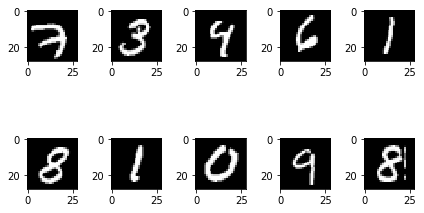

In [32]:
x_train = mnist.train.images
print(x_train.shape)
x_train_reshaped = np.reshape(x_train, (55000, 28, 28))
for i, k in enumerate(range(1, 11)):
    plt.subplot(2, 5, k)
    plt.imshow(x_train_reshaped[i], cmap = "gray")

plt.tight_layout()
plt.show()

## 安裝 TensorFlow（9）

- 卸載虛擬環境

```bash
# for mac
source deactive

# for windows
deactivate
```

## 安裝 TensorFlow（10）

- 移除虛擬環境（需要先卸載！）

```bash
conda info --envs
conda env remove --name tensorflow
```

## 安裝 TensorFlow（11）

- 移除 Jupyter Kernel

```bash
jupyter kernelspec list
jupyter kernelspec remove tensorflow
```

# NLTK

## NLTK 簡介

- Natural Language Toolkit

> NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources.

## NLTK 簡介（2）

- 安裝

```bash
pip install -U nltk
```

```python
import nltk
nltk.download('popular')
```

## NLTK 簡介（3）

- 斷字 
- `from nltk.tokenize import word_tokenize`

In [33]:
from nltk.tokenize import word_tokenize

print(word_tokenize("Joey doesn't share food!"))

['Joey', 'does', "n't", 'share', 'food', '!']


## NLTK 簡介（4）

- 斷詞
- `from nltk.tokenize import sent_tokenize`

In [34]:
from nltk.tokenize import sent_tokenize

print(sent_tokenize("This guy says hello. I wanna kill myself."))

['This guy says hello.', 'I wanna kill myself.']


## NLTK 簡介（5）

- 詞性標註
- `from ntlk.tag import pos_tag`

In [35]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

joey_words = word_tokenize("Joey doesn't share food!")
print(pos_tag(joey_words))

[('Joey', 'NNP'), ('does', 'VBZ'), ("n't", 'RB'), ('share', 'NN'), ('food', 'NN'), ('!', '.')]


# Jieba

## Jieba 簡介

> "Jieba" (Chinese for "to stutter") Chinese text segmentation: built to be the best Python Chinese word segmentation module.

## Jieba 簡介（2）

- 安裝

```bash
pip install jieba
```

## Jieba 簡介（3）

- 分詞
    - **精確模式**
    - 全模式
    - 搜尋引擎模式

In [36]:
import jieba

seg_list = jieba.cut("玉山銀行 Python 與資料科學入門", cut_all = False)
print("/".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/0b/r__z5mpn6ldgb_w2j7_y_ntr0000gn/T/jieba.cache
Loading model cost 0.494 seconds.
Prefix dict has been built succesfully.


玉山/銀行/ /Python/ /與/資料/科學/入門


## Jieba 簡介（4）

- 分詞
    - 精確模式
    - **全模式**
    - 搜尋引擎模式

In [37]:
seg_list = jieba.cut("玉山銀行 Python 與資料科學入門", cut_all = True)
print("/".join(seg_list))

玉山/銀/行//Python//與/資/料/科/學/入/門


## Jieba 簡介（5）

- 分詞
    - 精確模式
    - 全模式
    - **搜尋引擎模式**

In [38]:
seg_list = jieba.cut_for_search("玉山銀行 Python 與資料科學入門")
print("/".join(seg_list))

玉山/銀行/ /Python/ /與/資料/科學/入門


## Jieba 簡介（6）

- 詞性標註

In [39]:
import jieba.posseg as pseg

words = pseg.cut("玉山銀行 Python 與資料科學入門")
for word, flag in words:
    print '%s : %s' % (word, flag)

玉山 : ns
銀行 : n
  : x
Python : eng
  : x
與 : p
資料 : n
科學 : n
入門 : v


## 專題

- 試玩三個 Getting Started Kaggle 競賽：
    - [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)
    - [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
    - [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer)

## 參考連結

- [Kaggle](https://www.kaggle.com/)
- [TensorFlow](https://www.tensorflow.org/)
- [NLTK](http://www.nltk.org/)
- [Jieba](https://github.com/fxsjy/jieba)